# ODE-BVP's: Finite Difference Direct Methods
---

GENERAL PROBLEM: solve the 2-point boundary value problem

\begin{align}
  y''(x) = f(x, y(x), y'(x))
\end{align}

with boundary conditions

\begin{align}
  & \alpha_{1}y(0) + \beta_{1}y'(0) = g_{1}
  \\
  & \alpha_{2}y(L) + \beta_{2}y'(L) = g_{2}
\end{align}

Cases to consider:
- a. Dirichlet boundary conditions: $\beta_{1}=\beta_{2}=0$.
- b. Neumann boundary conditions: $\alpha_{1}=\beta_{2}=0$ or $\alpha_{2}=\beta_{1}=0$
- c. Mixed boundary conditions: any other combinations

IDEA: solve using finite differences. Discretize variables by letting $x\rightarrow x_{i}$ and $y(x_{i})\rightarrow y_{i}$, for $i=0,\ldots,N$. Because we are given boundary values at two points, rather than initial conditions at one point, we cannot march the solution forward as in the case of initial value problems. Instead, the discretized equations yield $N+1$ coupled algebraic equations that must be solved simultaneously. An approximate solution is found solving this system of algebraic equations for the $N+1$ unknown grid functions $y_{0},\ldots,y_{N}$.

**Linear ODE's:** In the case of a system of linear ODE's, the resulting discretized system of algebraic equations is also linear in the unknown grid functions. The solution then amounts to inverting a matrix equation. The matrix in question is typically sparse, which is inverted with relative ease, even for large $N$.

**Non-linear ODE's:** In the case of a system of non-linear ODE's, the resulting discretized system of algebraic equations is also non-linear in the unknown grid functions. In this case, one must use some sort of iterative procedure, for example based on Newton-Raphson method for solving systems of non-linear equations. Problems of this sort can be computationally expensive using finite differences. (Spectral methods and finite elements offer alternative approaches, which are beyond the scope of this notebook.) 

PRE-REQUISITES:
- Solving systems of linear equation (Gaussian elimination, LU factorization)
- Sparse Matrices
- Root finding methods for systems of non-linear equations (Newton-Raphson)

REFERENCES:
- [1] Burden and Faires, *Numerical Analysis, 7th edition*.
- [2] Garcia, *Numerical Methods for Physicists, 2nd edition*.
- [3] LeVeque, *Finite Difference Methods for Ordinary and Partial Differential Equations*.
- [4] Press et al, *Numerical Recipes, 3rd edition*.

## 1. Simple example

Consider the 2-point boundary value problem with Dirichlet boundary conditions for one degree of freedom

\begin{align}
  u''(x) = f(x)
  \quad\text{with}\quad
  u(0) = g_{1}
  \quad\text{and}\quad
  u(L) = g_{2}
\end{align}

where the source function $f(x)$ is given. To solve this analytically, we would simply integrate twice and impose the boundary conditions. 

To solve numerically, we discretize the spatial domain into $N$ cells. We have to choose whether to use a vertex-centered grid (grid points located at the edges of the cells) or cell-centered grid (grid points located at the center of the cells). Here we choose a vertex-centered grid, so that we have $N$ cells and $N+1$ grid points, evenly spaced between $x=0$ and $x=L$. The grid points are denoted $x_{j}$ where $j=0,\ldots,N$. The boundaries of the grid are given by $x_{0}=0$ and $x_{N}=L$. We may write

\begin{align}
  x_{j} = x_{0} + jh
  \quad,\quad
  j = 0,\ldots,N
\end{align}

where the spatial grid spacing is given by

\begin{align}
  h = \frac{x_\mathrm{max} - x_\mathrm{min}}{N} = \frac{L}{N}
\end{align}


Next we discretize the grid functions by taking $u(x)\rightarrow u(x_{j}) \equiv u_{j}$ and $f(x)\rightarrow f(x_{j})\equiv f_{j}$.

Finally, we discretize the derivatives that appear in the ODE. Here we will use a centered differencing scheme for the spatial derivatives. Putting this all together yield the discretized version of the ODE

\begin{align}
  \frac{u_{j-1} - 2u_{j} + u_{j+1}}{h^2} = f_{j}
  \quad,\quad
  j = 1,\ldots,N-1
\end{align}

with Dirichlet boundary conditions

\begin{align}
  & u_{0} = g_{1} \\
  & u_{N} = g_{2}
\end{align}

These may be re-written collectively as

\begin{align}
  u_{0} &= g_{1}\\
  u_{0} - 2u_{1} + u_{2} &= h^2 f_{1} \\
  u_{1} - 2u_{2} + u_{3} &= h^2 f_{2} \\
  \quad\cdots\quad &\cdots\quad\cdots\quad \\
  u_{N-3} - 2u_{N-2} + u_{N-1} &= h^2 f_{N-2} \\
  u_{N-2} - 2u_{N-1} + u_{N} &= h^2 f_{N-1} \\
  u_{N} &= g_{2} \\
\end{align}

This is a system of algebriac equations in the $N+1$ unknowns $u_{0},\ldots,u_{N}$. Furthermore, the system is **linear** in those unknowns, and so it can be put into matrix form

\begin{align}
  Au = b
\end{align}

where

\begin{align}
  A = \left[\begin{array}{ccccccc}
    1 & 0 & & & & & \\
    1 & -2 & 1 & & & & \\
    & 1 & -2 & 1 & & & \\
    & & \ddots & \ddots & \ddots & & \\ 
    & & & 1 & -2 & 1 & \\
    & & & & 1 & -2 & 1 \\
    & & & & & 0 & 1\\
  \end{array}\right]
  \quad,\quad  
  u = \left[\begin{array}{c}
    u_{0} \\
    u_{1} \\
    u_{2} \\
    \vdots \\
    u_{N-2} \\
    u_{N-1} \\
    u_{N}
  \end{array}\right]
  \quad,\quad
  b = \left[\begin{array}{c}
    g_{1} \\
    h^2 f_{1} \\
    h^2 f_{2} \\
    \vdots \\
    h^2 f_{N-2} \\
    h^2 f_{N-1} \\
    g_{2}
  \end{array}\right]
\end{align}

### Exact solution

Let $L=1$ and consider the following ODE-BVP

\begin{align}
  u''(x) = x
  \quad\text{with}\quad
  u(0) = g_{1}
  \quad\text{and}\quad
  u(1) = g_{2}
\end{align}

The analytic solution is found by integrating twice and imposing the boundary conditions to determine the constants of integration. The result is

\begin{align}
  u_\mathrm{exact}(x) = \tfrac{1}{6}x^3 + c_{1}x + c_{2}
\end{align}

where

\begin{align}
  & c_{1} = g_{2} - g_{1} - \frac{1}{6} \\
  & c_{2} = g_{2}
\end{align}

### CODE:

In [4]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
%matplotlib notebook
import matplotlib.pyplot as plt

# set boundary conditions
g1 = 2.0
g2 = 5.0

# set spatial grids
L = 1.0    # length of physical grid
xmin = 0.0 # left boundary
xmax = L   # right boundary
### low resolution grid ###
N1 = 10             # number of grid cells
h1 = (xmax-xmin)/N1 # grid spacing
x1 = np.linspace(xmin, xmax, N1+1)
### medium resolution grid ###
N2 = 2*N1           # number of grid cells
h2 = (xmax-xmin)/N2 # grid spacing
x2 = np.linspace(xmin, xmax, N2+1)
### high resolution grid ###
N3 = 2*N2           # number of grid cells
h3 = (xmax-xmin)/N3 # grid spacing
x3 = np.linspace(xmin, xmax, N3+1)

# define source function
def f(x):
    return x

# define exact solution
def exact(x, g1, g2):
    c1 = g2 - g1 - 1/6
    c2 = g1
    return (1/6)*x**3 + c1*x + c2
    
# define matrix, A
def matrix(N):
    A = sp.diags([1, -2, 1], [-1, 0, 1], shape=[N+1, N+1], format='csr')
    A[0,0] = 1
    A[0,1] = 0 
    A[-1,-2] = 0 
    A[-1,-1] = 1
    return A

# define rhs, b
def rhs(h, x):
    b = np.zeros_like(x)
    b[0] = g1
    b[1:-2] = h**2*f(x[1:-2])
    b[-1] = g2
    return b

# create input arrays, for three different resolutions
A1 = matrix(N1)
A2 = matrix(N2)
A3 = matrix(N3)

b1 = rhs(h1, x1)
b2 = rhs(h2, x2)
b3 = rhs(h3, x3)

# initialize output arrays, for three different resolutions
u1 = np.zeros_like(x1)
u2 = np.zeros_like(x2)
u3 = np.zeros_like(x3)

In [5]:
# solve using sp.linalg.spsolve()
u1 = sp.linalg.spsolve(A1, b1)
u2 = sp.linalg.spsolve(A2, b2)
u3 = sp.linalg.spsolve(A3, b3)

<IPython.core.display.Javascript object>


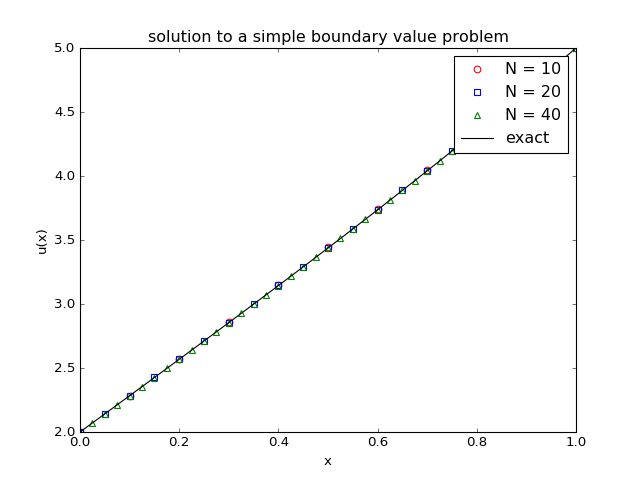

In [6]:
# plot solutions
fig, ax = plt.subplots(1,1)
ax.plot(x1, u1, 'o', markeredgecolor='red', markerfacecolor='none', 
        markersize=6, markeredgewidth=1, label=('N = %d' % N1))
ax.plot(x2, u2, 's', markeredgecolor='blue', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N2))
ax.plot(x3, u3, '^', markeredgecolor='green', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N3))
ax.plot(x3, exact(x3,g1,g2), 'k-', label='exact')
ax.set_xlim(xmin,xmax)
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('solution to a simple boundary value problem')
ax.legend(loc="upper right", numpoints=1)
plt.show()

### Assessment

In [7]:
# define residuals
def err(f1, f2):
    return np.abs(f1 - f2)

e1 = err(u1, exact(x1,g1,g2))
e2 = err(u2, exact(x2,g1,g2))
e3 = err(u3, exact(x3,g1,g2))

<IPython.core.display.Javascript object>


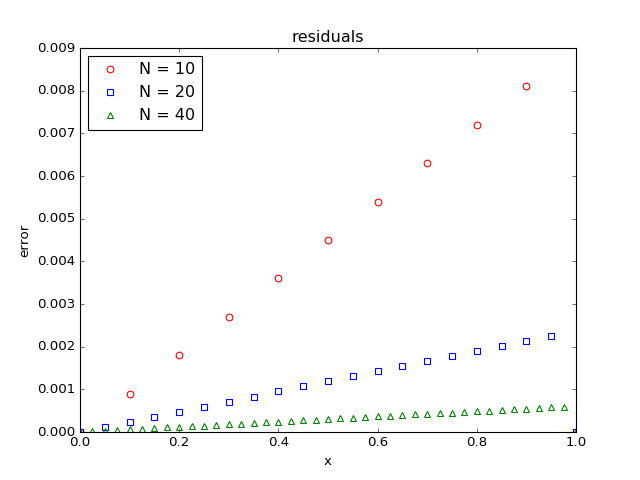

In [8]:
# plot residuals
fig, ax = plt.subplots(1,1)
ax.plot(x1, e1, 'o', markeredgecolor='red', markerfacecolor='none', 
        markersize=6, markeredgewidth=1, label=('N = %d' % N1))
ax.plot(x2, e2, 's', markeredgecolor='blue', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N2))
ax.plot(x3, e3, '^', markeredgecolor='green', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N3))
ax.set_xlim(xmin,xmax)
ax.set_xlabel('x')
ax.set_ylabel('error')
ax.set_title('residuals')
ax.legend(loc="upper left", numpoints=1)
plt.show()

In [9]:
# define L2 norm
def L2(h, unum, uex):
    err = np.abs(unum - uex)
    norm = np.sqrt(np.sum(err**2))
    return norm

norm1 = L2(h1, u1, exact(x1,g1,g2))
norm2 = L2(h2, u2, exact(x2,g1,g2))
norm3 = L2(h3, u3, exact(x3,g1,g2))

<IPython.core.display.Javascript object>


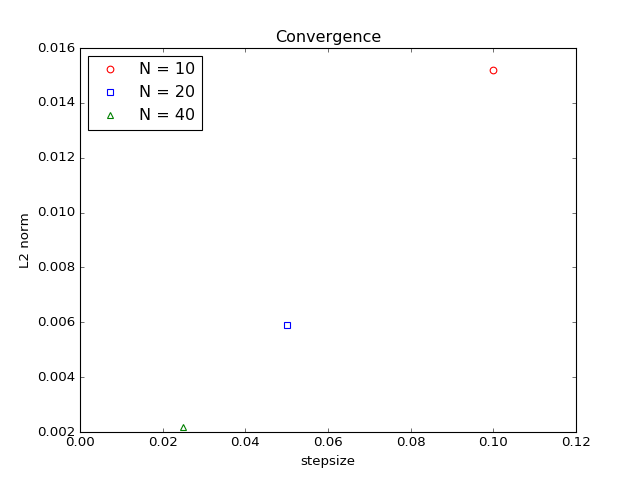

In [10]:
# convergence test
fig, ax = plt.subplots(1,1)
ax.plot(h1, norm1, 'o', markeredgecolor='red', markerfacecolor='none', 
        markersize=6, markeredgewidth=1, label=('N = %d' % N1))
ax.plot(h2, norm2, 's', markeredgecolor='blue', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N2))
ax.plot(h3, norm3, '^', markeredgecolor='green', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N3))
ax.set_xlim(0, 1.2*h1)
ax.set_xlabel('stepsize')
ax.set_ylabel('L2 norm')
ax.set_title('Convergence')
ax.legend(loc="upper left", numpoints=1)
plt.show()

## 2. Neumann boundary conditions

In general, a 2-point boundary value problem may have Neumann boundary conditions instead of Dirichlet boundary conditions. However, in the case of second-order ODE's, demanding Neumann boundary conditions at both boundaries results in an ill-posed problem (a unique solution does not exist; either no solutions exist, or infinitely many solutions exist). Nevertheless, the boundary conditions may be Neumann at one boundary and Dirichlet at the other. that is the case we consider here.

\begin{align}
  u''(x) = f(x)
\end{align}

with boundary conditions

\begin{align}
  u(0) = g_{1}
  \quad\text{and}\quad
  u'(L) = g_{2}
  \quad\quad\text{(case 1)}
\end{align}

or

\begin{align}
  u'(0) = g_{1}
  \quad\text{and}\quad
  u(L) = g_{2}
  \quad\quad\text{(case 2)}
\end{align}

The new thing here is how to handle the fact that the boundary conditions place a restriction on the derivative of $u(x)$ instead of the value of $u(x)$ itself. As before, we treat spatial derivatives using a centered differing scheme. Applying this scheme to the boundary points requires the introduction of virtual grid points, that is, points which lie outside of our computational domain. These virtual grid points are denoted by $x_{-1}$ and $x_{N+1}$, and correspondingly we have the virtual grid function values $u_{-1}$ and $u_{N+1}$ at those points.

**Case 1 **

Applying central differencing to the boundary condition at $x=L$ gives

\begin{align}
  \frac{u_{N+1} - u_{N-1}}{2h} = g_{2}
  \quad\Rightarrow\quad 
  u_{N+1} = u_{N-1} + 2h g_{2}
\end{align}

where we have introduced the virtual grid point $x_{N+1}$ with grid function value $u_{N+1}$.

This condition can be used to eliminate the virtual grid function value $u_{N+1}$ from the system of equations, yielding

\begin{align}
  u_{0} &= g_{1} \\
  u_{0} - 2u_{1} + u_{2} &= h^2 f_{1} \\
  u_{1} - 2u_{2} + u_{3} &= h^2 f_{2} \\
  \quad\cdots\quad &\cdots\quad\cdots\quad \\
  u_{N-3} - 2u_{N-2} + u_{N-1} &= h^2 f_{N-2} \\
  u_{N-2} - 2u_{N-1} + u_{N} &= h^2 f_{N-1} \\
  2u_{N-1} - 2u_{N} &= h^2 f_{N} - 2h g_{2} \\
\end{align}

or in matrix form 

\begin{align}
  Au = b
\end{align}

where 

\begin{align}
  A = 
  \left[\begin{array}{ccccccc}
    1 & 0 & & & & & \\
    1 & -2 & 1 & & & & \\
    & 1 & -2 & 1 & & & \\
    & & \ddots & \ddots & \ddots & & \\ 
    & & & 1 & -2 & 1 & \\
    & & & & 1 & -2 & 1 \\
    & & & & & 2 & -2 \\
  \end{array}\right]
  \quad,\quad  
  u = 
  \left[\begin{array}{c}
    u_{0} \\
    u_{1} \\
    u_{2} \\
    \vdots \\
    u_{N-2} \\
    u_{N-1} \\
    u_{N}
  \end{array}\right]
  \quad,\quad
  b = 
  \left[\begin{array}{c}
    g_{1} \\
    h^2 f_{1} \\
    h^2 f_{2} \\
    \vdots \\
    h^2 f_{N-2} \\
    h^2 f_{N-1} \\
    h^2 f_{N} - 2h g_{2}
  \end{array}\right]
\end{align}

**Case 2 **

Applying central differencing to the boundary condition at $x=0$ gives

\begin{align}
  \frac{u_{1} - u_{-1}}{2h} = g_{1}
  \quad\Rightarrow\quad 
  u_{-1} = u_{1} - 2h g_{1}
\end{align}

where we have introduced the virtual grid point $x_{-1}$ with grid function value $u_{-1}$.

This condition can be used to eliminate the virtual grid function value $u_{-1}$ from the system of equations, yielding


\begin{align}
  -2u_{0} + 2u_{1} &= h^2 f_{0} + 2h g_{1} \\
  u_{0} - 2u_{1} + u_{2} &= h^2 f_{1} \\
  u_{1} - 2u_{2} + u_{3} &= h^2 f_{2} \\
  \quad\cdots\quad &\cdots\quad\cdots\quad \\
  u_{N-3} - 2u_{N-2} + u_{N-1} &= h^2 f_{N-2} \\
  u_{N-2} - 2u_{N-1} + u_{N} &= h^2 f_{N-1} \\
  u_{N} &= g_{2} \\
\end{align}

or in matrix form 

\begin{align}
  Au = b
\end{align}

where 

\begin{align}
  A = 
  \left[\begin{array}{ccccccc}
    -2 & 2 & & & & & \\
    1 & -2 & 1 & & & & \\
    & 1 & -2 & 1 & & & \\
    & & \ddots & \ddots & \ddots & & \\ 
    & & & 1 & -2 & 1 & \\
    & & & & 1 & -2 & 1 \\
    & & & & & 0 & 1 \\
  \end{array}\right]
  \quad,\quad  
  u = 
  \left[\begin{array}{c}
    u_{0} \\
    u_{1} \\
    u_{2} \\
    \vdots \\
    u_{N-2} \\
    u_{N-1} \\
    u_{N}
  \end{array}\right]
  \quad,\quad
  b = 
  \left[\begin{array}{c}
    h^2 f_{0} + 2h g_{1} \\
    h^2 f_{1} \\
    h^2 f_{2} \\
    \vdots \\
    h^2 f_{N-2} \\
    h^2 f_{N-1} \\
    g_{2}
  \end{array}\right]
\end{align}


**Exercise:** Show that if Neumann boundary conditions are applied simultaneously to $x=0$ and $x=L$, the resulting matrix is singular.

The resulting matrix would be 

\begin{align}
  A = 
  \left[\begin{array}{ccccccc}
    -2 & 2 & & & & & \\
    1 & -2 & 1 & & & & \\
    & 1 & -2 & 1 & & & \\
    & & \ddots & \ddots & \ddots & & \\ 
    & & & 1 & -2 & 1 & \\
    & & & & 1 & -2 & 1 \\
    & & & & & 2 & -2 \\
  \end{array}\right]
\end{align}

Here we will show that a $n\times n$ matrix of this form is singular, for the case $n=10$. The same can be verified for any $n$.

In [11]:
# construct matrix for 10 x 10 case
n = 100
A = sp.diags([1, -2, 1], [-1, 0, 1], shape=[n+1,n+1], format='csr')
A[0,0]=-2
A[0,1]=2
A[-1,-1]=-2
A[-1,-2]=2
A.toarray()

array([[-2.,  2.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2., -2.]])

In [12]:
np.linalg.inv(A.toarray())

LinAlgError: Singular matrix

### Example

Consider the following ODE-BVP on the interval $[0,1]$:

\begin{align}
  u''(x) = x
  \quad,\quad
  u(0) = 1
  \quad,\quad
  u'(1) = 0
\end{align}

The exact solution is

\begin{align}
  u_\mathrm{exact}(x) = \tfrac{1}{6}x^3 + c_{1}x + c_{2}
\end{align}

where

\begin{align}
  c_{1} = g_{2} - \frac{1}{2}
  \quad,\quad
  c_{2} = g_{1}
\end{align}

This is an example of case 1 above.

### CODE:

In [13]:
# set boundary conditions
g1 = 0.0
g2 = 1.0

# set spatial grids
L = 1.0    # length of physical grid
xmin = 0.0 # left boundary
xmax = L   # right boundary
### low resolution grid ###
N1 = 20             # number of grid cells
h1 = (xmax-xmin)/N1 # grid spacing
x1 = np.linspace(xmin, xmax, N1+1)
### medium resolution grid ###
N2 = 2*N1           # number of grid cells
h2 = (xmax-xmin)/N2 # grid spacing
x2 = np.linspace(xmin, xmax, N2+1)
### high resolution grid ###
N3 = 2*N2           # number of grid cells
h3 = (xmax-xmin)/N3 # grid spacing
x3 = np.linspace(xmin, xmax, N3+1)

# define source function
def f(x):
    return x

# define exact solution
def exact(x, g1, g2):
    c1 = g2 - 1/2
    c2 = g1
    return (1/6)*x**3 + c1*x + c2
    
# define matrix, A
def matrix(N):
    A = sp.diags([1, -2, 1], [-1, 0, 1], shape=[N+1, N+1], format='csr')
    A[0,0] = 1
    A[0,1] = 0 
    A[-1,-2] = 2 
    A[-1,-1] = -2
    return A

# define rhs, b
def rhs(h, x):
    b = np.zeros_like(x)
    b[0] = g1
    b[1:-2] = h**2*f(x[1:-2])
    b[-1] = h**2*f(x[-1]) - 2*h*g2
    return b

# create input arrays, for three different resolutions
A1 = matrix(N1)
A2 = matrix(N2)
A3 = matrix(N3)

b1 = rhs(h1, x1)
b2 = rhs(h2, x2)
b3 = rhs(h3, x3)

# initialize output arrays, for three different resolutions
u1 = np.zeros_like(x1)
u2 = np.zeros_like(x2)
u3 = np.zeros_like(x3)

In [14]:
# solve using sp.linalg.spsolve()
u1 = sp.linalg.spsolve(A1, b1)
u2 = sp.linalg.spsolve(A2, b2)
u3 = sp.linalg.spsolve(A3, b3)

<IPython.core.display.Javascript object>


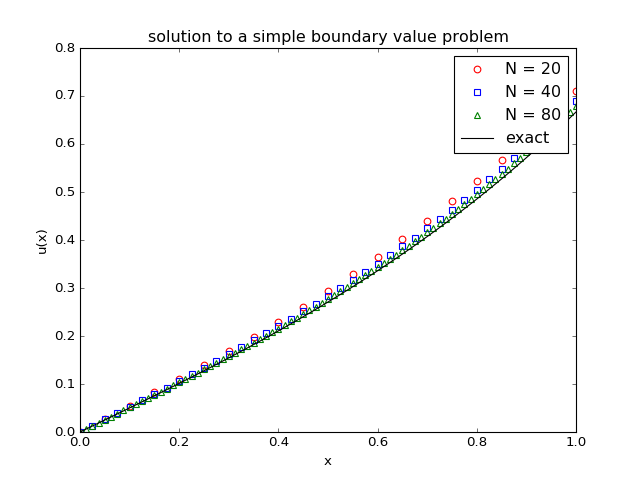

In [15]:
# plot solutions
fig, ax = plt.subplots(1,1)
ax.plot(x1, u1, 'o', markeredgecolor='red', markerfacecolor='none', 
        markersize=6, markeredgewidth=1, label=('N = %d' % N1))
ax.plot(x2, u2, 's', markeredgecolor='blue', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N2))
ax.plot(x3, u3, '^', markeredgecolor='green', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N3))
ax.plot(x3, exact(x3,g1,g2), 'k-', label='exact')
ax.set_xlim(xmin,xmax)
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('solution to a simple boundary value problem')
ax.legend(loc="upper right", numpoints=1)
plt.show()

### Assessment

In [16]:
# define residuals
def err(f1, f2):
    return np.abs(f1 - f2)

e1 = err(u1, exact(x1,g1,g2))
e2 = err(u2, exact(x2,g1,g2))
e3 = err(u3, exact(x3,g1,g2))

<IPython.core.display.Javascript object>


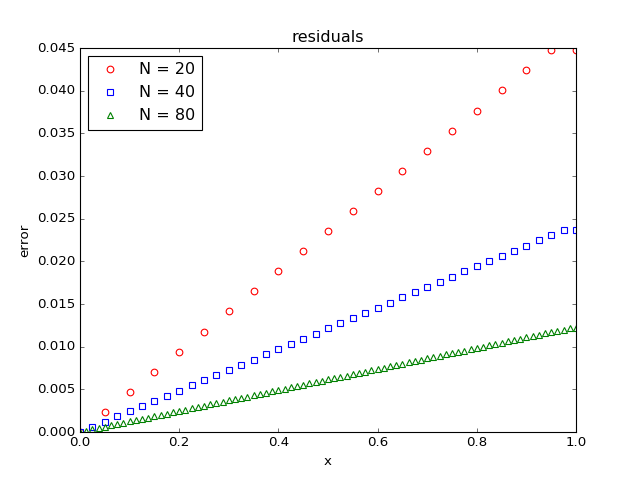

In [17]:
# plot residuals
fig, ax = plt.subplots(1,1)
ax.plot(x1, e1, 'o', markeredgecolor='red', markerfacecolor='none', 
        markersize=6, markeredgewidth=1, label=('N = %d' % N1))
ax.plot(x2, e2, 's', markeredgecolor='blue', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N2))
ax.plot(x3, e3, '^', markeredgecolor='green', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N3))
ax.set_xlim(xmin,xmax)
ax.set_xlabel('x')
ax.set_ylabel('error')
ax.set_title('residuals')
ax.legend(loc="upper left", numpoints=1)
plt.show()

In [18]:
# define L2 norm
def L2(h, unum, uex):
    err = np.abs(unum - uex)
    norm = np.sqrt(np.sum(err**2))
    return norm

norm1 = L2(h1, u1, exact(x1,g1,g2))
norm2 = L2(h2, u2, exact(x2,g1,g2))
norm3 = L2(h3, u3, exact(x3,g1,g2))

<IPython.core.display.Javascript object>


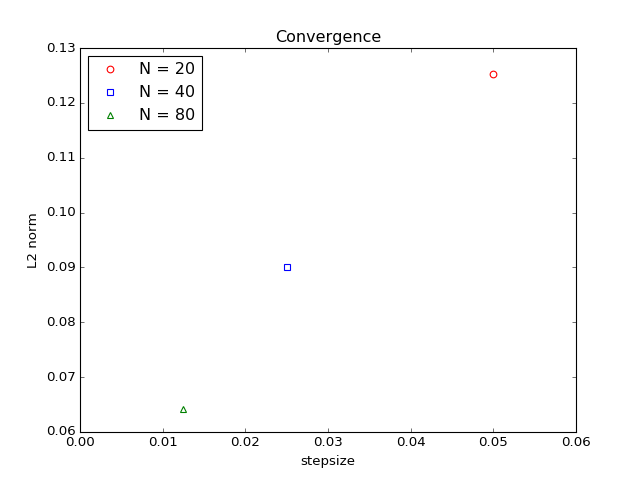

In [19]:
# convergence test
fig, ax = plt.subplots(1,1)
ax.plot(h1, norm1, 'o', markeredgecolor='red', markerfacecolor='none', 
        markersize=6, markeredgewidth=1, label=('N = %d' % N1))
ax.plot(h2, norm2, 's', markeredgecolor='blue', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N2))
ax.plot(h3, norm3, '^', markeredgecolor='green', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N3))
ax.set_xlim(0, 1.2*h1)
ax.set_xlabel('stepsize')
ax.set_ylabel('L2 norm')
ax.set_title('Convergence')
ax.legend(loc="upper left", numpoints=1)
plt.show()

## 3. Mixed boundary conditions

Consider the 2-point boundary value problem with mixed boundary conditions

\begin{align}
  u''(x) = f(x)
\end{align}

with 

\begin{align}
  \alpha_{1}u(0) + \beta_{1}u'(0) = g_{1} \\
  \alpha_{2}u(L) + \beta_{2}u'(L) = g_{2}
\end{align}

In what follows we assume $\alpha_{i}\neq 0$ and $\beta_{i}\neq 0$. If any of these are zero, one has to repeat the analysis for that special case.

As with Neumann boundary conditions, we treat spatial derivatives using a centered differencing scheme and augment the grid (and grid functions) with virtual grid points at $x_{-1}$ and $x_{N+1}$ (and corresponding virtual grid function values $u_{-1}$ and $u_{N+1}$).

Applying central differencing to the boundary conditions gives

\begin{align}
  \alpha_{1}u_{0} + \beta_{1}\left(\frac{u_{1} - u_{-1}}{2h}\right) = g_{1}
  &\quad\Rightarrow\quad
  u_{-1}  = 2h\frac{\alpha_{1}}{\beta_{1}}u_{0} + u_{1} - 2h\frac{g_{1}}{\beta_{1}}
  \\
  \alpha_{2}u_{N} + \beta_{2}\left(\frac{u_{N+1} - u_{N-1}}{2h}\right) = g_{2}
  &\quad\Rightarrow\quad 
  u_{N+1} = -2h\frac{\alpha_{2}}{\beta_{2}}u_{N} + u_{N-1} + 2h\frac{g_{2}}{\beta_{2}}
\end{align}

These can be used to eliminate the virtual grid function values $u_{-1}$ and $u_{N+1}$ from the system of equations, yielding

\begin{align}
  -2\left(1 - h\frac{\alpha_{1}}{\beta_{1}}\right)u_{0} + 2u_{1} &= h^2 f_{0} + 2h\frac{g_{1}}{\beta_{1}} \\
  u_{0} - 2u_{1} + u_{2} &= h^2 f_{1} \\
  u_{1} - 2u_{2} + u_{3} &= h^2 f_{2} \\
  \quad\cdots\quad &\cdots\quad\cdots\quad \\
  u_{N-3} - 2u_{N-2} + u_{N-1} &= h^2 f_{N-2} \\
  u_{N-2} - 2u_{N-1} + u_{N} &= h^2 f_{N-1} \\
  2u_{N-1} - 2\left(1 + h\frac{\alpha_{2}}{\beta_{2}}\right)u_{N} &= h^2 f_{N} - 2h\frac{g_{2}}{\beta_{2}} \\
\end{align}

or in matrix form 

\begin{align}
  Au = b
\end{align}

where 

\begin{align}
  A = 
  \left[\begin{array}{ccccccc}
    -2\left(1 - h\frac{\alpha_{1}}{\beta_{1}}\right) & 2 & & & & & \\
    1 & -2 & 1 & & & & \\
    & 1 & -2 & 1 & & & \\
    & & \ddots & \ddots & \ddots & & \\ 
    & & & 1 & -2 & 1 & \\
    & & & & 1 & -2 & 1 \\
    & & & & & 2 & -2\left(1 + h\frac{\alpha_{2}}{\beta_{2}}\right) \\
  \end{array}\right]
  \quad,\quad  
  u = 
  \left[\begin{array}{c}
    u_{0} \\
    u_{1} \\
    u_{2} \\
    \vdots \\
    u_{N-2} \\
    u_{N-1} \\
    u_{N}
  \end{array}\right]
  \quad,\quad
  b = 
  \left[\begin{array}{c}
    h^2 f_{0} + 2h\frac{g_{1}}{\beta_{1}} \\
    h^2 f_{1} \\
    h^2 f_{2} \\
    \vdots \\
    h^2 f_{N-2} \\
    h^2 f_{N-1} \\
    h^2 f_{N} - 2h\frac{g_{2}}{\beta_{2}}
  \end{array}\right]
\end{align}

### Example

Consider the following ODE-BVP on the interval $[0,1]$:

\begin{align}
  u''(x) = x
  \quad,\quad
  \alpha_{1}u(0) + \beta_{1}u'(0) = g_{1}
  \quad,\quad
  \alpha_{2}u(1) + \beta_{2}u'(1) = g_{2}
\end{align}

The exact solution is

\begin{align}
  u_\mathrm{exact}(x) = \tfrac{1}{6}x^3 + c_{1}x + c_{2}
\end{align}

where

\begin{align}
  & c_{1} = \frac{-\alpha_{2}g_{1} + \alpha_{1}g_{2} - \tfrac{1}{6}\alpha_{1}(\alpha_{2}+3\beta_{2})}
  {\alpha_{1}\alpha_{2} + \alpha_{1}\beta_{2} - \alpha_{2}\beta_{1}}
  \\
  & c_{2} = \frac{(\alpha_{2}+\beta_{2})g_{1} - \beta_{1}g_{2} + \tfrac{1}{6}\beta_{1}(\alpha_{2}+3\beta_{2})}
  {\alpha_{1}\alpha_{2} + \alpha_{1}\beta_{2} - \alpha_{2}\beta_{1}}
\end{align}

Here we assume that $\alpha_{1}$, $\beta_{1}$, $\alpha_{2}$, and $\beta_{2}$ are all non-zero and also that

\begin{align}
  \alpha_{1}\alpha_{2} + \alpha_{1}\beta_{2} - \alpha_{2}\beta_{1} \neq 0
\end{align}

### CODE:

In [20]:
# set boundary conditions
alpha1=1.0
beta1=1.0
g1 = 0.0

alpha2=1.0
beta2=-2.0
g2 = 0.0

# set spatial grids
L = 1.0    # length of physical grid
xmin = 0.0 # left boundary
xmax = L   # right boundary
### low resolution grid ###
N1 = 20             # number of grid cells
h1 = (xmax-xmin)/N1 # grid spacing
x1 = np.linspace(xmin, xmax, N1+1)
### medium resolution grid ###
N2 = 2*N1           # number of grid cells
h2 = (xmax-xmin)/N2 # grid spacing
x2 = np.linspace(xmin, xmax, N2+1)
### high resolution grid ###
N3 = 2*N2           # number of grid cells
h3 = (xmax-xmin)/N3 # grid spacing
x3 = np.linspace(xmin, xmax, N3+1)

# define source function
def f(x):
    return x

# define exact solution
def exact(x, a1, b1, g1, a2, b2, g2):
    dmtr = a1*a2 + a1*b2 - a2*b1
    c1 = (-a2*g1 + a1*g2 - (1/6)*a1*(a2 + 3*b2))/dmtr
    c2 = ((a2 + b2)*g1 - b1*g2 + (1/6)*b1*(a2 + 3*b2))/dmtr
    return (1/6)*x**3 + c1*x + c2
    
# define matrix, A
def matrix(N, h, alpha1, beta1, alpha2, beta2):
    A = sp.diags([1, -2, 1], [-1, 0, 1], shape=[N+1, N+1], format='csr')
    A[0,0] = -2*(1 - h*alpha1/beta1)
    A[0,1] = 2
    A[-1,-2] = 2 
    A[-1,-1] = -2*(1 + h*alpha2/beta2)
    return A

# define rhs, b
def rhs(x, h, g1, beta1, g2, beta2):
    b = np.zeros_like(x)
    b[:] = h**2*f(x[:])
    b[0] = b[0] + 2*h*g1/beta1
    b[-1] = b[-1] - 2*h*g2/beta2 
    return b

# create input arrays, for three different resolutions
A1 = matrix(N1, h1, alpha1, beta1, alpha2, beta2)
A2 = matrix(N2, h2, alpha1, beta1, alpha2, beta2)
A3 = matrix(N3, h3, alpha1, beta1, alpha2, beta2)

b1 = rhs(x1, h1, g1, beta1, g2, beta2)
b2 = rhs(x2, h2, g1, beta1, g2, beta2)
b3 = rhs(x3, h3, g1, beta1, g2, beta2)

# initialize output arrays, for three different resolutions
u1 = np.zeros_like(x1)
u2 = np.zeros_like(x2)
u3 = np.zeros_like(x3)

In [21]:
# solve using sp.linalg.spsolve()
u1 = sp.linalg.spsolve(A1, b1)
u2 = sp.linalg.spsolve(A2, b2)
u3 = sp.linalg.spsolve(A3, b3)

<IPython.core.display.Javascript object>


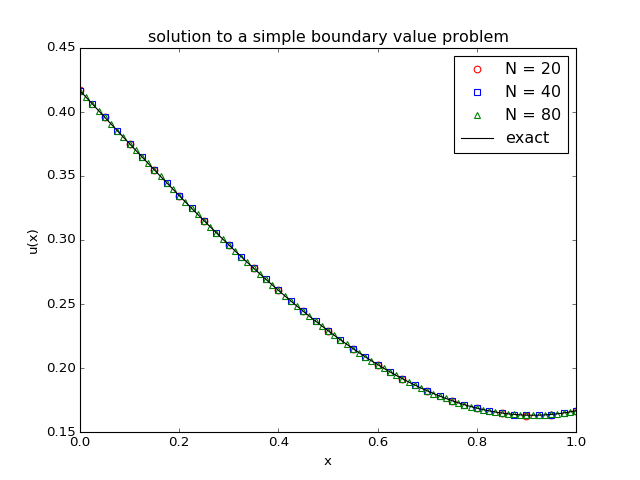

In [22]:
# plot solutions
fig, ax = plt.subplots(1,1)
ax.plot(x1, u1, 'o', markeredgecolor='red', markerfacecolor='none', 
        markersize=6, markeredgewidth=1, label=('N = %d' % N1))
ax.plot(x2, u2, 's', markeredgecolor='blue', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N2))
ax.plot(x3, u3, '^', markeredgecolor='green', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N3))
ax.plot(x3, exact(x3, alpha1, beta1, g1, alpha2, beta2, g2), 'k-', label='exact')
ax.set_xlim(xmin,xmax)
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('solution to a simple boundary value problem')
ax.legend(loc="upper right", numpoints=1)
plt.show()

### Assessment

In [23]:
# define residuals
def err(f1, f2):
    return np.abs(f1 - f2)

e1 = err(u1, exact(x1, alpha1, beta1, g1, alpha2, beta2, g2))
e2 = err(u2, exact(x2, alpha1, beta1, g1, alpha2, beta2, g2))
e3 = err(u3, exact(x3, alpha1, beta1, g1, alpha2, beta2, g2))

<IPython.core.display.Javascript object>


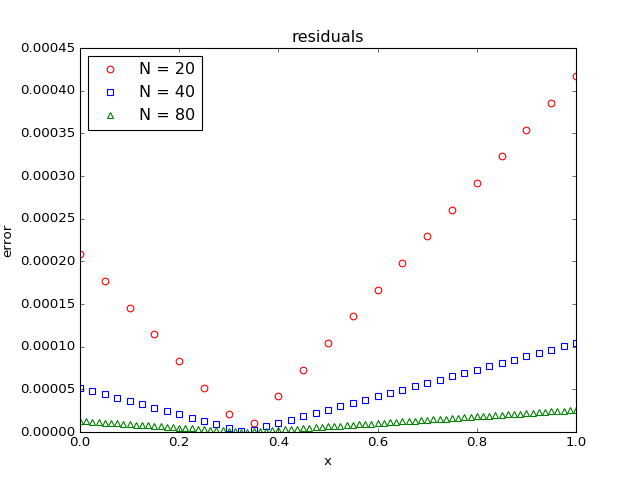

In [24]:
# plot residuals
fig, ax = plt.subplots(1,1)
ax.plot(x1, e1, 'o', markeredgecolor='red', markerfacecolor='none', 
        markersize=6, markeredgewidth=1, label=('N = %d' % N1))
ax.plot(x2, e2, 's', markeredgecolor='blue', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N2))
ax.plot(x3, e3, '^', markeredgecolor='green', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N3))
ax.set_xlim(xmin,xmax)
ax.set_xlabel('x')
ax.set_ylabel('error')
ax.set_title('residuals')
ax.legend(loc="upper left", numpoints=1)
plt.show()

In [51]:
# define L2 norm
def L2(h, unum, uex):
    err = np.abs(unum - uex)
    norm = np.sqrt(np.sum(err**2))
    return norm

norm1 = L2(h1, u1, exact(x1, alpha1, beta1, g1, alpha2, beta2, g2))
norm2 = L2(h2, u2, exact(x2, alpha1, beta1, g1, alpha2, beta2, g2))
norm3 = L2(h3, u3, exact(x3, alpha1, beta1, g1, alpha2, beta2, g2))

<IPython.core.display.Javascript object>


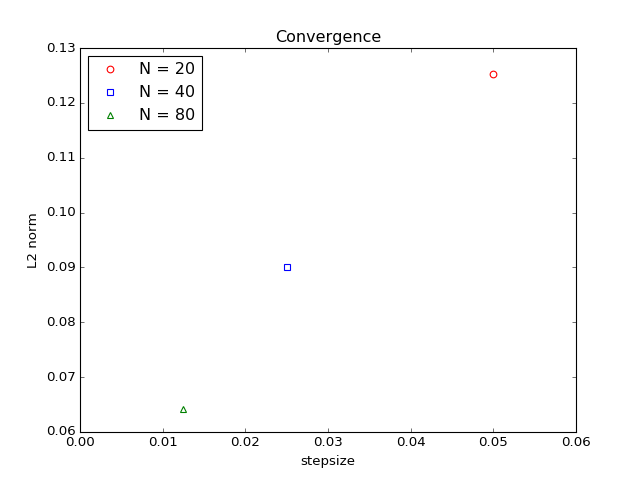

In [25]:
# convergence test
fig, ax = plt.subplots(1,1)
ax.plot(h1, norm1, 'o', markeredgecolor='red', markerfacecolor='none', 
        markersize=6, markeredgewidth=1, label=('N = %d' % N1))
ax.plot(h2, norm2, 's', markeredgecolor='blue', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N2))
ax.plot(h3, norm3, '^', markeredgecolor='green', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N3))
ax.set_xlim(0, 1.2*h1)
ax.set_xlabel('stepsize')
ax.set_ylabel('L2 norm')
ax.set_title('Convergence')
ax.legend(loc="upper left", numpoints=1)
plt.show()

## 4. General linear BVP's

Consider a more general 2nd order ODE

\begin{align}
  u''(x) + p(x)u'(x) + q(x)u(x) = f(x)
\end{align}

where the coefficient functions $p(x)$ and $q(x)$ are given, as is the source function $f(x)$.

As before, we discretize the spatial domain into $N$ evenly spaced cells with grid points given by

\begin{align}
  x_{j} = x_{0} + jh
  \quad,\quad
  j = 0,\ldots,N
\end{align}

and where the spatial grid spacing is given by

\begin{align}
  h = \frac{x_\mathrm{max} - x_\mathrm{min}}{N} = \frac{L}{N}
\end{align}

Next, discretize the grid functions

\begin{align}
  u(x) &\quad\rightarrow\quad u(x_{j}) \equiv u_{j} \\
  p(x) &\quad\rightarrow\quad p(x_{j}) \equiv p_{j} \\
  q(x) &\quad\rightarrow\quad q(x_{j}) \equiv q_{j} \\
  f(x) &\quad\rightarrow\quad f(x_{j}) \equiv f_{j} \\
\end{align}

Finally, using a centered differencing scheme for the spatial derivatives yields the 3-point stencil

\begin{align}
  & \frac{u_{j-1} - 2u_{j} + u_{j+1}}{h^2} + p_{j}\left(\frac{u_{j+1} - u_{j-1}}{2h}\right) + q_{j}u_{j} = f_{j}
  \quad,\quad j = 1,\ldots,N-1
  \\
  & \Rightarrow\quad
  (2 - hp_{j})u_{j-1} - 2(2 - h^2 q_{j})u_{j} 
  + (2 + hp_{j})u_{j+1} = 2h^2 f_{j}
\end{align}

For simplicity, here we will only consider Dirichlet boundary conditions

\begin{align}
  & u_{0} = g_{1} \\
  & u_{N} = g_{2}
\end{align}

The system of equations is then collectively written as

\begin{align}
  u_{0} &= g_{1}
  \\
  (2 - hp_{1})u_{0} - 2(2 - h^2 q_{1})u_{1} 
  + (2 + hp_{1})u_{2} = 2h^2 f_{1}
  \\
  (2 - hp_{2})u_{1} - 2(2 - h^2 q_{2})u_{2} 
  + (2 + hp_{2})u_{3} = 2h^2 f_{2}
  \\
  \quad\cdots\quad &\cdots\quad\cdots\quad 
  \\
  (2 - hp_{N-2})u_{N-3} - 2(2 - h^2 q_{N-2})u_{N-2} 
  + (2 + hp_{N-2})u_{N-1} = 2h^2 f_{N-2}
  \\
  (2 - hp_{N-1})u_{N-2} - 2(2 - h^2 q_{N-1})u_{N-1} 
  + (2 + hp_{N-1})u_{N} = 2h^2 f_{N-1}
  \\
  u_{N} &= g_{2}
\end{align}

or in matrix form

\begin{align}
  Au = b
\end{align}

where

\begin{align}
  A = \left[\begin{array}{cccccc}
    1 & 0 & 0 & & & \\
    (2-hp_{1}) & -2(2-h^2 q_{1}) & (2+hp_{1}) & & & \\
    & (2-hp_{2}) & -2(2-h^2 q_{2}) & (2+hp_{2}) & & \\
    & \ddots & \ddots & \ddots & & \\
    & & (2-hp_{N-2}) & -2(2-h^2 q_{N-2}) & (2+hp_{N-2}) & \\
    & & & (2-hp_{N-1}) & -2(2-h^2 q_{N-1}) & (2+hp_{N-1}) \\
    & & & 0 & 0 & 1\\
  \end{array}\right]
\end{align}
\begin{align}
  u = \left[\begin{array}{c}
    u_{0} \\
    u_{1} \\
    u_{2} \\
    \vdots \\
    u_{N-2} \\
    u_{N-1} \\
    u_{N}
  \end{array}\right]
  \quad,\quad
  b = \left[\begin{array}{c}
    g_{1} \\
    2h^2 f_{1} \\
    2h^2 f_{2} \\
    \vdots \\
    2h^2 f_{N-2} \\
    2h^2 f_{N-1} \\
    g_{2}
  \end{array}\right]
\end{align}

### Example

[Burden and Faires, example 2, section 11.1]

Consider the following ODE-BVP on the interval $[1,2]$:

\begin{align}
  u''(x) = -\frac{2}{x}u'(x) + \frac{2}{x^2}u(x) + \frac{\sin(\ln{x})}{x^2}
  \quad,\quad
  u(1) = 1
  \quad,\quad
  u(2) = 2
\end{align}

The exact solution is

\begin{align}
  u_\mathrm{exact}(x) = c_{1}x + \frac{c_{2}}{x^2} - \frac{3}{10}\sin(\ln{x}) - \frac{1}{10}\cos(\ln{x})
\end{align}

where

\begin{align}
  c_{2} = \frac{1}{70}\left[8 - 12\sin(\ln{2}) - 4\cos(\ln{2})\right]
  \approx -0.03920701320
\end{align}

and 

\begin{align}
  c_{1} = \frac{11}{10} - c_{2} 
  \approx 1.1392070132
\end{align}

Here we have Dirichlet boundary conditions with $g_{1}=1$ and $g_{2}=2$. Also

\begin{align}
  & p(x) = \frac{2}{x} \\
  & q(x) = -\frac{2}{x^2} \\
  & f(x) = \frac{\sin(\ln{x})}{x^2} \\
\end{align}

### CODE:

In [33]:
# set boundary conditions
g1 = 1.0
g2 = 2.0

# set spatial grids
L = 1.0             # length of physical grid
xmin = 1.0          # left boundary
xmax = xmin + L     # right boundary
### low resolution grid ###
N1 = 20             # number of grid cells
h1 = (xmax-xmin)/N1 # grid spacing
x1 = np.linspace(xmin, xmax, N1+1)
### medium resolution grid ###
N2 = 2*N1           # number of grid cells
h2 = (xmax-xmin)/N2 # grid spacing
x2 = np.linspace(xmin, xmax, N2+1)
### high resolution grid ###
N3 = 2*N2           # number of grid cells
h3 = (xmax-xmin)/N3 # grid spacing
x3 = np.linspace(xmin, xmax, N3+1)

# define coefficient functions
def p(x):
    return 2./x

def q(x):
    return -2./(x*x)

# define source function
def f(x):
    return np.sin(np.log(x))/(x*x)

# define exact solution
def exact(x):
    c2 = (1./70.)*(8. - 12.*np.sin(np.log(2.)) - 4*np.cos(np.log(2.)))
    c1 = 11./10. - c2
    return c1*x + c2/(x*x) - (3./10.)*np.sin(np.log(x)) - (1./10.)*np.cos(np.log(x)) 

# define matrix, A
def matrix(N, h, x):
    A = sp.diags([1,1,1], [-1, 0, 1], shape=[N+1,N+1], format='lil')
    for i in range(0, N+1):
        for j in range(0, N+1):
            if j == i-1:
                A[i,j] = 2 - h*p(x[i])
            elif j == i:
                A[i,j] = -2*(2 - h**2*q(x[i]))
            elif j == i+1:
                A[i,j] = 2 + h*p(x[i])
            else:
                A[i,j] = 0                
    A[0,0] = 1
    A[0,1] = 0
    A[-1,-2] = 0 
    A[-1,-1] = 1
    return A.tocsr()

# define rhs, b
def rhs(h, x):
    b = np.zeros_like(x)
    b[1:-1] = 2*h*h*f(x[1:-1])
    b[0] = g1
    b[-1] = g2
    return b

# create input arrays, for three different resolutions
A1 = matrix(N1, h1, x1)
A2 = matrix(N2, h2, x2)
A3 = matrix(N3, h3, x3)

b1 = rhs(h1, x1)
b2 = rhs(h2, x2)
b3 = rhs(h3, x3)

# initialize output arrays, for three different resolutions
u1 = np.zeros_like(x1)
u2 = np.zeros_like(x2)
u3 = np.zeros_like(x3)

In [34]:
# solve using sp.linalg.spsolve()
u1 = sp.linalg.spsolve(A1, b1)
u2 = sp.linalg.spsolve(A2, b2)
u3 = sp.linalg.spsolve(A3, b3)

<IPython.core.display.Javascript object>


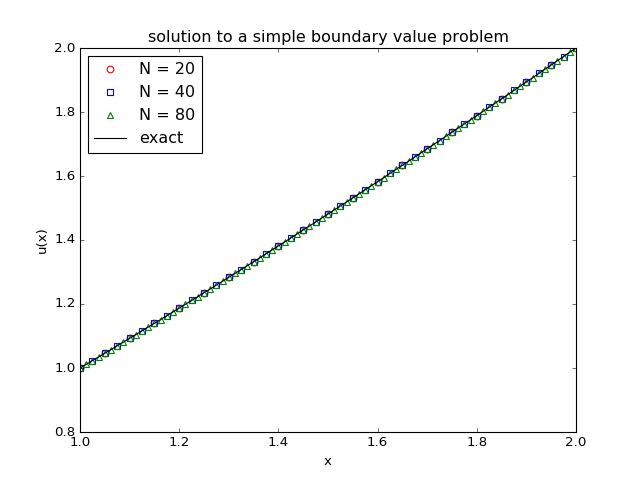

In [37]:
# plot solutions
fig, ax = plt.subplots(1,1)
ax.plot(x1, u1, 'o', markeredgecolor='red', markerfacecolor='none', 
        markersize=6, markeredgewidth=1, label=('N = %d' % N1))
ax.plot(x2, u2, 's', markeredgecolor='blue', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N2))
ax.plot(x3, u3, '^', markeredgecolor='green', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N3))
ax.plot(x3, exact(x3), 'k-', label='exact')
ax.set_xlim(xmin,xmax)
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('solution to a simple boundary value problem')
ax.legend(loc="upper left", numpoints=1)
plt.show()

### Assessment

In [29]:
# define residuals
def err(f1, f2):
    return np.abs(f1 - f2)

e1 = err(u1, exact(x1))
e2 = err(u2, exact(x2))
e3 = err(u3, exact(x3))

<IPython.core.display.Javascript object>


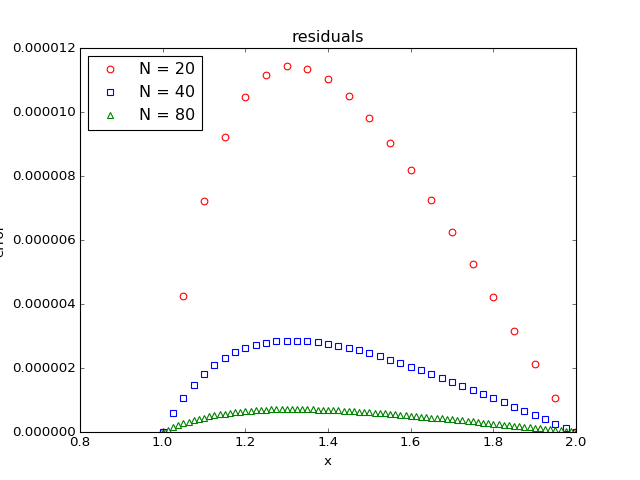

In [30]:
# plot residuals
fig, ax = plt.subplots(1,1)
ax.plot(x1, e1, 'o', markeredgecolor='red', markerfacecolor='none', 
        markersize=6, markeredgewidth=1, label=('N = %d' % N1))
ax.plot(x2, e2, 's', markeredgecolor='blue', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N2))
ax.plot(x3, e3, '^', markeredgecolor='green', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N3))
ax.set_xlim(xmin,xmax)
ax.set_xlabel('x')
ax.set_ylabel('error')
ax.set_title('residuals')
ax.legend(loc="upper left", numpoints=1)
plt.show()

In [31]:
# define L2 norm
def L2(h, unum, uex):
    err = np.abs(unum - uex)
    norm = np.sqrt(np.sum(err**2))
    return norm

norm1 = L2(h1, u1, exact(x1))
norm2 = L2(h2, u2, exact(x2))
norm3 = L2(h3, u3, exact(x3))

<IPython.core.display.Javascript object>


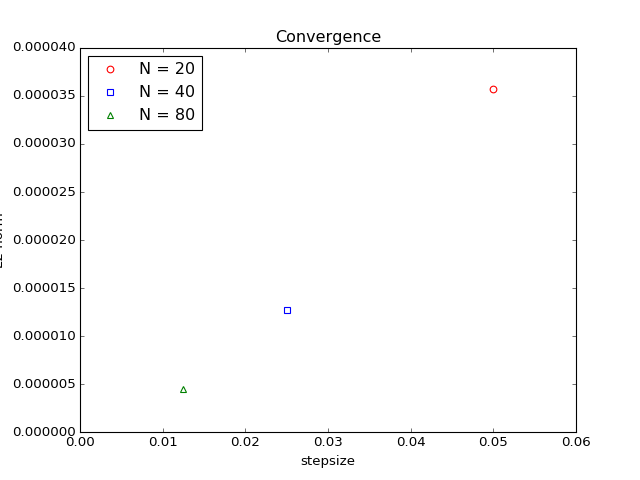

In [32]:
# convergence test
fig, ax = plt.subplots(1,1)
ax.plot(h1, norm1, 'o', markeredgecolor='red', markerfacecolor='none', 
        markersize=6, markeredgewidth=1, label=('N = %d' % N1))
ax.plot(h2, norm2, 's', markeredgecolor='blue', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N2))
ax.plot(h3, norm3, '^', markeredgecolor='green', markerfacecolor='none',
        markersize=6, markeredgewidth=1, label=('N = %d' % N3))
ax.set_xlim(0, 1.2*h1)
ax.set_xlabel('stepsize')
ax.set_ylabel('L2 norm')
ax.set_title('Convergence')
ax.legend(loc="upper left", numpoints=1)
plt.show()

## 6. Non-linear BVP's

### Example

### CODE:

### Assessment